<a href="https://colab.research.google.com/github/brbdicals/data-story-telling/blob/main/Data_Story_Telling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Story Telling

# Ingest

Sources



*   [Datascience meets intermittent fasting](https://noahgift.com/articles/datascience-meets-intermittent-fasting/)
*   List item



# EDA

## Approximately 10 Years of Bodyweight

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/intermittent-fasting/master/weight.csv")
df.head()

Date  Weight (lb)
0  12/22/2019        222.9
1  12/18/2019        222.0
2  12/15/2019        222.2
3   12/7/2019        219.3
4   12/1/2019        220.4

Create datetime index

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.set_index('Datetime')
df = df.drop(['Date'], axis=1)
df.head()

Weight (lb)
Datetime               
2019-12-22        222.9
2019-12-18        222.0
2019-12-15        222.2
2019-12-07        219.3
2019-12-01        220.4

In [ ]:
df.columns

Index(['Weight (lb)'], dtype='object')

### Descriptive Statistics

In [ ]:
df.describe()

Weight (lb)
count  1013.000000
mean    225.407601
std       4.813612
min     213.400000
25%     221.900000
50%     224.400000
75%     228.000000
max     245.200000

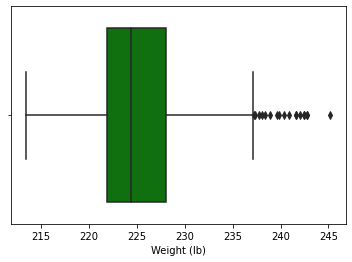

In [ ]:
sns.boxplot(x=df["Weight (lb)"], color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


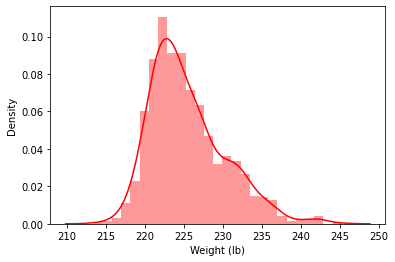

In [ ]:
sns.distplot(df["Weight (lb)"], color="red")

### Time Series Plot

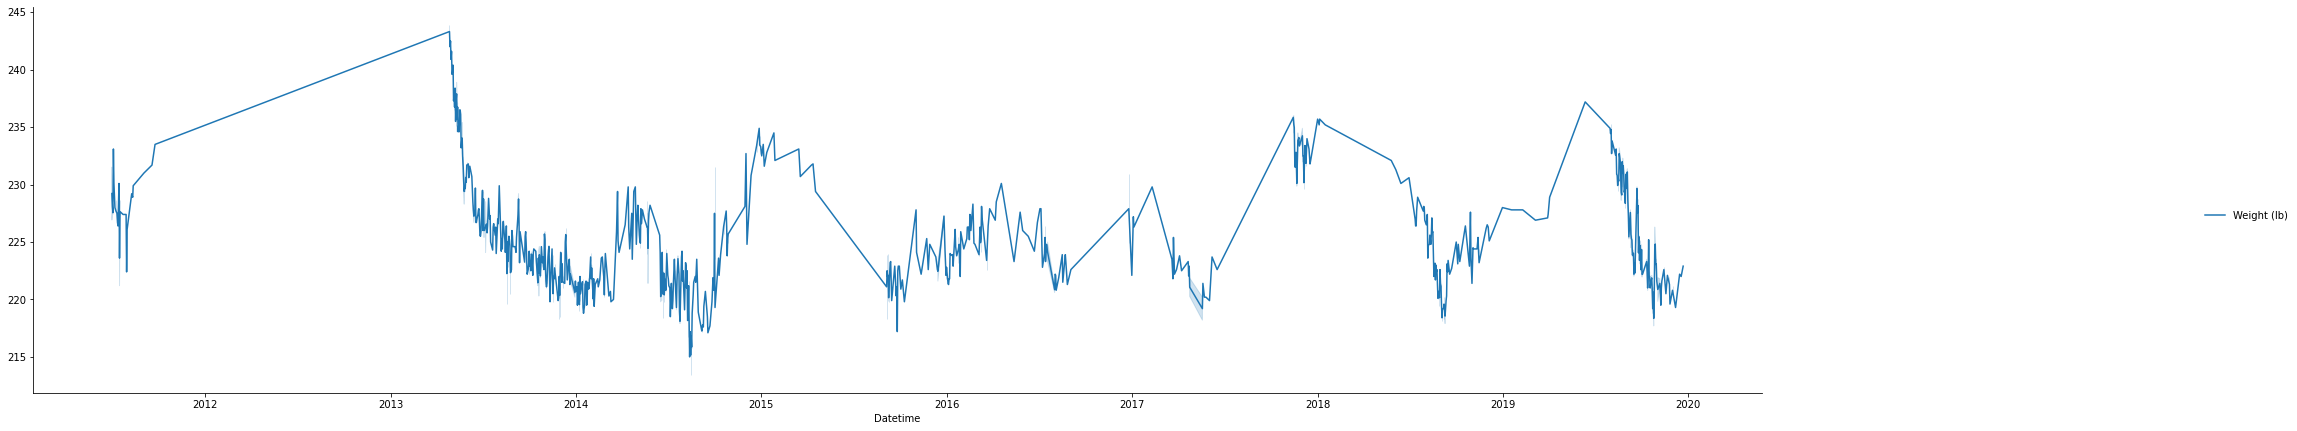

In [ ]:
g = sns.relplot(data=df, kind="line", ci=68)
g.fig.set_size_inches(35,6)
g.set_titles("Body Weight 2011-2019")

This notebook is featured in [Practical MLOps book by O'Reilly](https://learning.oreilly.com/library/view/practical-mlops/9781098103002/) as well a Coursera + Duke Course.

### Clean

In [ ]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


Weight (lb)
Datetime                        
2019-12-22 00:00:00        222.9
2019-12-18 00:00:00        222.0
2019-12-15 00:00:00        222.2
2019-12-07 00:00:00        219.3
2019-12-01 00:00:00        220.4

## MLB-EDA

### Ingest-MLB-Data

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()

Name Team       Position  Height  Weight    Age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71

Find N/A

In [ ]:
df.shape

(1034, 6)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = df.dropna()
df.isnull().values.any()

False

In [ ]:
df.shape

(1033, 6)

In [ ]:
df.describe()

Height       Weight          Age
count  1033.000000  1033.000000  1033.000000
mean     73.698935   201.689255    28.737648
std       2.306330    20.991491     4.322298
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.930000
75%      75.000000   215.000000    31.240000
max      83.000000   290.000000    48.520000

What about positions?  What can we infer about a typical player from different positions?

In [ ]:
df_positions = df.groupby("Position").median()
df_positions.reset_index(inplace=True)
df_positions

Position  Height  Weight     Age
0            Catcher    73.0   205.0  30.060
1  Designated_Hitter    74.5   224.5  29.200
2      First_Baseman    74.0   220.0  28.800
3         Outfielder    73.0   200.0  28.140
4     Relief_Pitcher    74.0   200.0  27.560
5     Second_Baseman    72.0   185.0  28.435
6          Shortstop    72.0   180.0  27.800
7   Starting_Pitcher    74.5   205.0  27.390
8      Third_Baseman    73.0   200.0  27.900

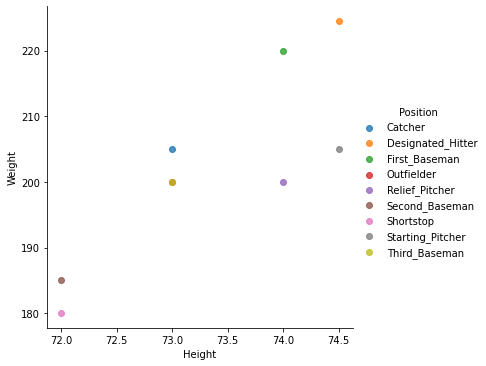

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Height", y="Weight",data=df_positions, hue="Position")

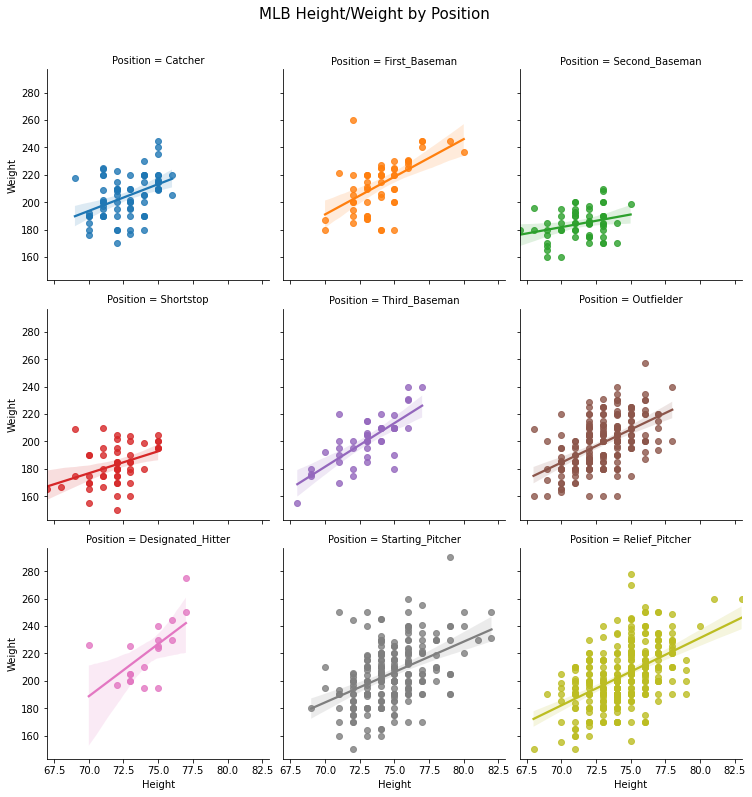

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Select Feature

Using Weight to Predict Height, so just one feature


In [ ]:
var = df['Height'].values
var.shape

(1033,)

In [ ]:
y = df['Height'].values #Target
y = y.reshape(-1, 1)
X = df['Weight'].values #Feature(s)
X = X.reshape(-1,1)

In [ ]:
X.shape

(1033, 1)

In [ ]:
y.shape

(1033, 1)

### Split Data and Scale Data

Scaling workflow step by step to make it easier to understand

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X)
X


array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [ ]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [ ]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [ ]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


### Fit the model

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
y_test.shape

(104, 1)

In [ ]:
predictions.shape

(104, 1)

unscaled predictions, converted to DataFrame and described

In [ ]:
df_predictions = pd.DataFrame(predictions)
df.describe()

Height       Weight          Age
count  1033.000000  1033.000000  1033.000000
mean     73.698935   201.689255    28.737648
std       2.306330    20.991491     4.322298
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.930000
75%      75.000000   215.000000    31.240000
max      83.000000   290.000000    48.520000

### Plot Predictions

Let's inverse scale back to view predictions in a form we can understand, then plot

In [ ]:
df_inverse_scaled_prediction = pd.DataFrame(y_scaler.inverse_transform(y))
df_inverse_scaled_prediction.describe()

0
count  1033.000000
mean     73.698935
std       2.306330
min      67.000000
25%      72.000000
50%      74.000000
75%      75.000000
max      83.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Height')

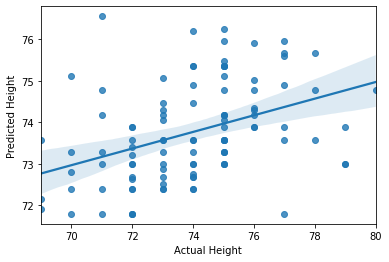

In [ ]:
plot = sns.regplot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(predictions))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [ ]:
model.score(X_test, y_test)

0.1377576695531494

## Sugar and Education

### Data Cleaning

#### CDC 2013 Source

TABLE 3. Crude prevalence* of sugar-sweetened beverage† consumption ≥1 time/day among adults, by employment status, education, and state — Behavioral Risk Factor Surveillance System, 23 states and District of Columbia, 2013

https://www.cdc.gov/mmwr/volumes/65/wr/mm6507a1.htm

In [ ]:
import pandas as pd


In [ ]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
cdc_2013.head()

Employed  ...  College graduate
State                                   ...                  
Alaska                26.2 (23.6–28.9)  ...  12.9 (10.5–15.7)
Arizona               33.0 (28.5–37.8)  ...  14.6 (11.6–18.3)
California            22.9 (20.9–25.1)  ...   11.5 (9.8–13.5)
Connecticut           18.9 (17.1–20.9)  ...   10.2 (8.7–12.0)
District of Columbia  18.5 (15.7–21.7)  ...    8.4 (7.0–10.1)

[5 rows x 7 columns]

In [ ]:
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True) 
cdc_2013.head()
  

State  Employed  ...  Some college  College graduate
0                Alaska      26.2  ...          24.2              12.9
1               Arizona      33.0  ...          24.4              14.6
2            California      22.9  ...          21.4              11.5
3           Connecticut      18.9  ...          19.9              10.2
4  District of Columbia      18.5  ...          28.9               8.4

[5 rows x 8 columns]

In [ ]:
cdc_2013.describe()

Employed  Not employed  ...  Some college  College graduate
count  24.000000     24.000000  ...     24.000000         24.000000
mean   32.325000     35.408333  ...     30.262500         17.358333
std     9.917803      9.056485  ...      8.490138          6.730264
min    16.700000     21.500000  ...     16.900000          7.800000
25%    23.400000     29.750000  ...     24.200000         12.850000
50%    31.550000     32.600000  ...     28.200000         15.300000
75%    42.025000     46.025000  ...     39.250000         23.500000
max    49.700000     49.500000  ...     47.200000         34.900000

[8 rows x 7 columns]

### Education and Sugar


In [ ]:
!wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
!ls -l

--2021-09-07 01:31:04--  https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘us-states.json’

us-states.json      100%[===================>]  85.63K  --.-KB/s    in 0.02s   

2021-09-07 01:31:04 (4.96 MB/s) - ‘us-states.json’ saved [87688/87688]

total 92
drwxr-xr-x 1 root root  4096 Sep  1 19:26 sample_data
-rw-r--r-- 1 root root 87688 Sep  7 01:31 us-states.json


#### Low Education == High Sugar

In [ ]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2013,
    columns=['State', '<High school'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='<High school Education and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

#### College Education Major Decrease in Sugar Intake

In [ ]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2013,
    columns=['State', 'College graduate'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='College graduate and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Median Daily Sugar Intake by Category

In [ ]:
cdc_2013.columns

Index(['State', 'Employed', 'Not employed', 'Retired', '<High school',
       'High school', 'Some college', 'College graduate'],
      dtype='object')

College Graduate

In [ ]:
cdc_2013["College graduate"].median()

15.3

In [ ]:
cdc_2013["<High school"].median()

46.35

Text(0.5, 1.0, 'CDC 2013: Three Times Higher Sugar Intake College vs High School Grads')

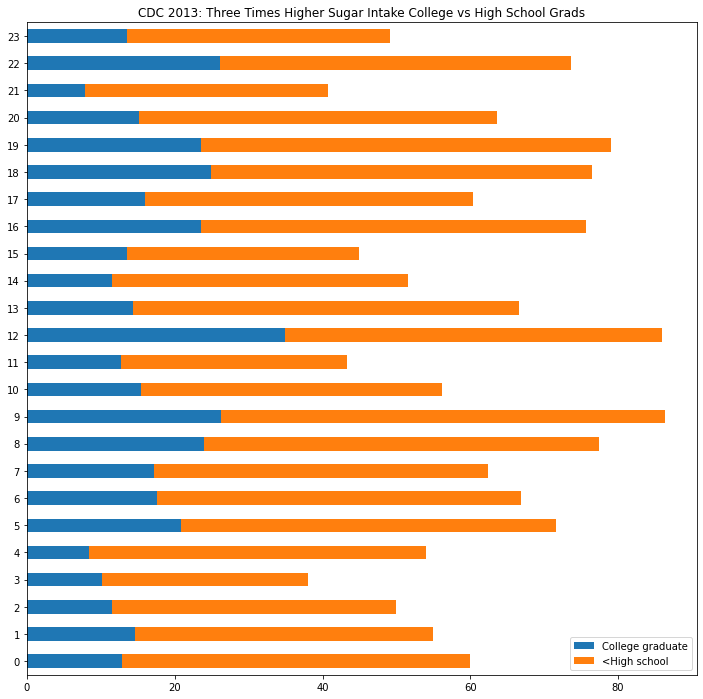

In [ ]:
cdc_2013[["State","College graduate", "<High school"]].plot.barh(
    stacked=True, figsize=(12, 12)).set_title("CDC 2013: Three Times Higher Sugar Intake College vs High School Grads")

## Health and Covid-19

### Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

Last five rows

In [ ]:
df.tail()

date          state  fips   cases  deaths
30369  2021-09-05       Virginia    51  778167   11899
30370  2021-09-05     Washington    53  577720    6749
30371  2021-09-05  West Virginia    54  197984    3124
30372  2021-09-05      Wisconsin    55  741412    8521
30373  2021-09-05        Wyoming    56   77206     858

*What are the columns?*

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [ ]:
df.shape

(30374, 5)

### EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [ ]:
df.describe()

fips         cases        deaths
count  30374.000000  3.037400e+04  30374.000000
mean      31.963357  3.135750e+05   6034.066669
std       18.667962  5.451161e+05  10045.732840
min        1.000000  1.000000e+00      0.000000
25%       17.000000  1.585175e+04    351.000000
50%       31.000000  1.087415e+05   2033.000000
75%       46.000000  3.948822e+05   7241.000000
max       78.000000  4.518576e+06  66481.000000

*Cases and Deaths in the USA due to Covid-19*

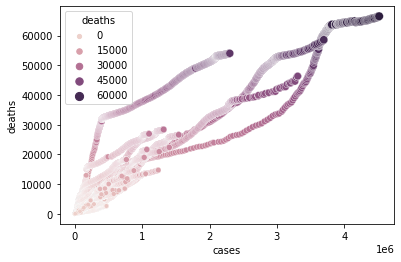

In [ ]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2021-09-05', '2021-09-05', '2021-09-05', '2021-09-05',
               '2021-09-05', '2021-09-05', '2021-09-05', '2021-09-05',
               '2021-09-05', '2021-09-05'],
              dtype='datetime64[ns]', name='date', length=30374, freq=None)

*Filter results by date range*

In [ ]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2021-09-07
Two days ago 2021-09-05


In [ ]:
df.loc[daybefore:today].head()

state  fips    cases  deaths
date                                         
2021-09-05     Alabama     1   722122   12415
2021-09-05      Alaska     2    89927     431
2021-09-05     Arizona     4  1030430   18998
2021-09-05    Arkansas     5   463795    7057
2021-09-05  California     6  4518576   66481

*The distribution of the data by date*

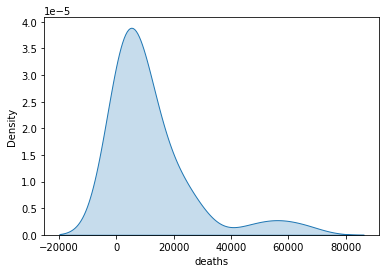

In [ ]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [ ]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

state  fips    cases  deaths
date                                           
2021-09-05    California     6  4518576   66481
2021-09-05         Texas    48  3696245   58572
2021-09-05      New York    36  2301437   54007
2021-09-05       Florida    12  3308916   46324
2021-09-05  Pennsylvania    42  1319681   28395
2021-09-05    New Jersey    34  1102488   26948
2021-09-05      Illinois    17  1542870   26614
2021-09-05       Georgia    13  1401865   22373
2021-09-05      Michigan    26  1069258   21657
2021-09-05          Ohio    39  1253198   20947

*There should be 50 states and District of Columbia*

In [ ]:
current_df.shape

(55, 4)

### State Based Analysis

*Get 10 states and subset*

In [ ]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'New Jersey',
 'Illinois',
 'Georgia',
 'Michigan',
 'Ohio']

In [ ]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [ ]:
set(top_states_df.state.values)

{'California',
 'Florida',
 'Georgia',
 'Illinois',
 'Michigan',
 'New Jersey',
 'New York',
 'Ohio',
 'Pennsylvania',
 'Texas'}

<Figure size 1080x360 with 0 Axes>

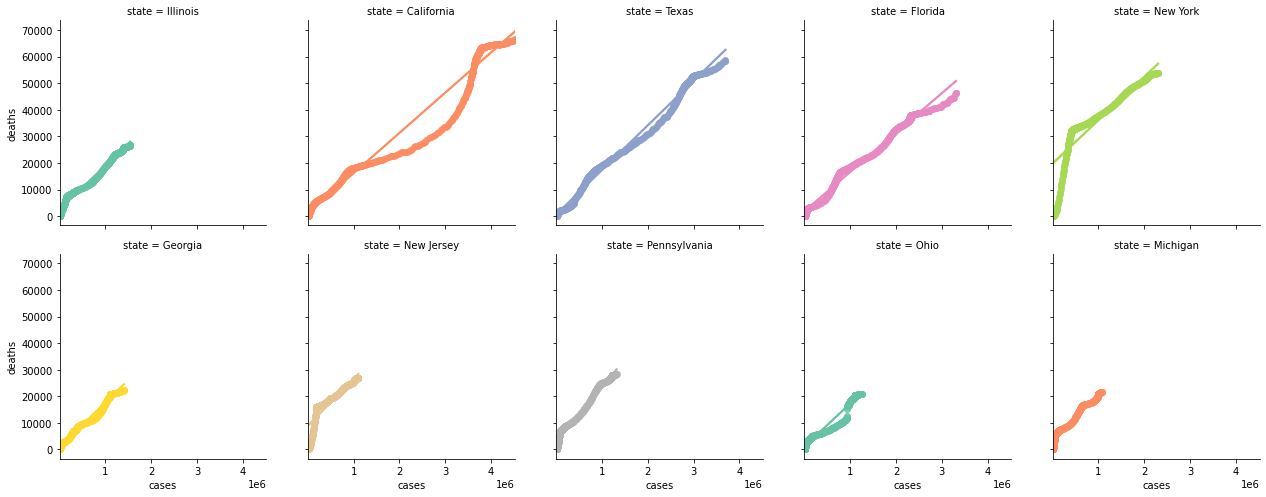

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [ ]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

state  cases  deaths
date                               
2020-03-10  Michigan      2       0
2020-03-11  Michigan      2       0
2020-03-09      Ohio      3       0
2020-03-10      Ohio      3       0
2020-03-11      Ohio      4       0

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [ ]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

state  ...  College graduate
0                Alaska  ...              12.9
1               Arizona  ...              14.6
2            California  ...              11.5
3           Connecticut  ...              10.2
4  District of Columbia  ...               8.4

[5 rows x 8 columns]

*Combine Sugar Data and Covid-19 Data*

In [ ]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

state  fips  cases  deaths  employed-sugar-intake-daily
0  California     6      1       0                         22.9
1  California     6      2       0                         22.9
2  California     6      2       0                         22.9
3  California     6      2       0                         22.9
4  California     6      2       0                         22.9

*What about data from the 2016 Election?*

In [ ]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

state Winning Party  Democrats  Republicans
0     Alabama   Republicans          0            1
1      Alaska   Republicans          0            1
2     Arizona   Republicans          0            1
3    Arkansas   Republicans          0            1
4  California     Democrats          1            0

In [ ]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

state  fips  cases  ...  Winning Party  Democrats Republicans
0  California     6      1  ...      Democrats          1           0
1  California     6      2  ...      Democrats          1           0
2  California     6      2  ...      Democrats          1           0
3  California     6      2  ...      Democrats          1           0
4  California     6      2  ...      Democrats          1           0

[5 rows x 8 columns]

*Generate Heatmap*

In [ ]:
sugar_covid_df.corr()

fips     cases  ...  Democrats  Republicans
fips                         1.000000 -0.122954  ...  -0.188854     0.188854
cases                       -0.122954  1.000000  ...   0.213867    -0.213867
deaths                      -0.098532  0.904990  ...   0.353345    -0.353345
employed-sugar-intake-daily  0.268704 -0.125279  ...  -0.767226     0.767226
Democrats                   -0.188854  0.213867  ...   1.000000    -1.000000
Republicans                  0.188854 -0.213867  ...  -1.000000     1.000000

[6 rows x 6 columns]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [ ]:
sugar_covid_df.to_csv("covid-eda.csv")

*What about Real-Estate Data?*

## Matthew-Effect-Home-Price-Clustering

Unsupervised Machine Learning technique that discovers hidden labels

#### Exploration of Zillow Home Prices 


##### Ingest

In [15]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import cufflinks as cf

Grab data from [Zillow Research](https://www.zillow.com/research/data/)

Example:

https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

In [8]:
df = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df.head()

RegionID  SizeRank  ... 2021-06-30 2021-07-31
0    102001         0  ... 293121.000 298933.000
1    394913         1  ... 544198.000 552607.000
2    753899         2  ... 811628.000 831593.000
3    394463         3  ... 276069.000 280130.000
4    394514         4  ... 305540.000 313393.000

[5 rows x 312 columns]

In [ ]:
mylist = list(df)
#print(mylist)

#RegionTypeList = df['RegionType'].tolist()
#print(RegionTypeList)

df1 = df[df['RegionName'].str.contains("CA")]
print(df1)

#### Cluster Housing in USA
Rename RegionName to ZipCode and Change Zip Code to String 

In [9]:
#df.rename(columns={"RegionID":"ZipCode"}, inplace=True)
df.drop(columns=["RegionID"],inplace=True)
#df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
#df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

SizeRank                          RegionName  ... 2021-06-30 2021-07-31
0         0                       United States  ... 293121.000 298933.000
1         1                        New York, NY  ... 544198.000 552607.000
2         2  Los Angeles-Long Beach-Anaheim, CA  ... 811628.000 831593.000
3         3                         Chicago, IL  ... 276069.000 280130.000
4         4               Dallas-Fort Worth, TX  ... 305540.000 313393.000

[5 rows x 311 columns]

In [10]:
median_prices = df.median()

In [11]:
median_prices.tail()

2021-03-31   170249.000
2021-04-30   171542.000
2021-05-31   173224.000
2021-06-30   174315.000
2021-07-31   176366.500
dtype: float64

In [31]:
sf_df = df[df["RegionName"] == "San Francisco, CA"].median()
palo_alto = df[df["RegionName"] == "San Jose, CA"].median()
df_comparison = pd.concat([sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["San Francisco, CA", "San Jose, CA", "Median USA"]

Setup Plotly and Cufflinks

In [32]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
cf.go_offline()
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script 
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

##### Effects of Tech Boom, Regressive Taxation and Single-Family Zoning

In [33]:
enable_plotly_in_cell()
df_comparison.iplot(
                    title="Regressive Taxation and Single Family Zoning 1994-2021",
                    xTitle="Year",
                    yTitle="Sales Price",
                    shape=(3,1),
                    fill=True,)

##### Cluster on Size Rank and Price


In [36]:
df.head()

SizeRank                          RegionName  ... 2021-06-30 2021-07-31
0         0                       United States  ... 293121.000 298933.000
1         1                        New York, NY  ... 544198.000 552607.000
2         2  Los Angeles-Long Beach-Anaheim, CA  ... 811628.000 831593.000
3         3                         Chicago, IL  ... 276069.000 280130.000
4         4               Dallas-Fort Worth, TX  ... 305540.000 313393.000

[5 rows x 311 columns]

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
columns_to_drop = ['StateName', 'RegionName', 'RegionType']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [42]:
df_numerical.columns

Index(['SizeRank', '1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
       '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31', '1996-09-30',
       ...
       '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31'],
      dtype='object', length=308)

In [43]:
df_numerical.describe()

SizeRank  1996-01-31  1996-02-29  ...  2021-05-31  2021-06-30  2021-07-31
count   434.000     434.000     434.000  ...     434.000     434.000     434.000
mean    363.392   92162.553   92208.069  ...  237625.311  242160.908  246946.712
std     259.940   41662.547   41580.651  ...  168418.446  173294.017  178238.413
min       1.000   29049.000   29085.000  ...   54018.000   54023.000   54063.000
25%     134.000   61558.750   61736.750  ...  132718.250  134049.250  135662.750
50%     327.500   84459.500   84411.500  ...  183353.000  185803.500  187535.500
75%     561.500  111034.500  111333.750  ...  287503.250  295678.500  302392.500
max     930.000  289479.000  288560.000  ... 1383114.000 1427537.000 1462949.000

[8 rows x 308 columns]

In [44]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

434


In [51]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2021-01-31"]/cluster_df["1996-01-31"],2)
cluster_df['RegionNameAppRatio'] = cluster_df['RegionName'].map(str) + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

SizeRank  ...                       RegionNameAppRatio
1         1  ...                        New York, NY-2.75
2         2  ...  Los Angeles-Long Beach-Anaheim, CA-4.02
3         3  ...                         Chicago, IL-1.76
4         4  ...               Dallas-Fort Worth, TX-2.47
5         5  ...                     Philadelphia, PA-2.3

[5 rows x 314 columns]

###### Socialism for the rich

In [52]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script 
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [54]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x=cluster_df["appreciation_ratio"],
    y=cluster_df["1996-01-31"],
    z=cluster_df["2021-01-31"],
    mode='markers',
    text=cluster_df["RegionNameAppRatio"],
    marker=dict(
        size=12,
        color=cluster_df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="30 Year History USA Real Estate Prices (Clusters Colored)",
    scene = dict(
        xaxis = dict(title='X: Appreciation Ratio'),
        yaxis = dict(title="Y:  1996 Prices"),
        zaxis = dict(title="Z:  2021 Prices"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [55]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [56]:
cluster_df.columns

Index(['SizeRank', 'RegionName', 'RegionType', 'StateName', '1996-01-31',
       '1996-02-29', '1996-03-31', '1996-04-30', '1996-05-31', '1996-06-30',
       ...
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', 'cluster', 'appreciation_ratio',
       'RegionNameAppRatio'],
      dtype='object', length=314)

### AutoML (Why work so hard?)

* Google AutoML Tables
* Amazon Machine Learning
* Azure ML Studio

## Conclusion

**The general public is unaware of many subtle aspects of bodyweight that affect health and longevity. ** Here is a summary of the key facts.


* Life long muscularity could be beneficial
* BMI may too crude of a tool to measure health
* There is evidence to suggest IF (Intermittent Fasting) could be beneficial
* There is evidence of the "Matthew Effect" for weath and health, i.e. the rich get richer and healthier  




**Where did this dataset come from and what can this tell us?**


*Abstract*

We employ a unique dataset of Major League Baseball (MLB) players – a select, healthy population – to examine trends in height, weight, and body mass in birth cohorts from 1869 to 1983. Over that 115-year time period, U.S. born MLB players have gained, on average, approximately 3 in. (7.6 cm) in height and 27.0 lb (12.2 kg) in weight, which has contributed a 1.6-unit increase in the body mass index. Where comparable data are available, U.S. born MLB players are about 2.0 in. (5.1 cm) taller and 20.0 lb (9.1 kg) heavier but substantially less obese than males in the general U.S. population. But both groups exhibit similar height and weight trends; the majority of height and weight gains take place in cohorts that were born prior to World War II, followed by slower gains and occasional declines in height and weight for cohorts born in 1939 and later.


[Historical trends in height, weight, and body mass: Data from U.S. Major League Baseball players, 1869–1983]( https://www.sciencedirect.com/science/article/pii/S1570677X08000324?via%3Dihub)


*Abstract*

*Results*: Compared to 20‐year‐old U.S. males, MLB players can expect almost five additional years of life. Height, weight, handedness, and player ratings are unassociated with the risk of death in this population of highly active and successful adults. Career length is inversely associated with the risk of death, likely because those who play longer gain additional incomes, physical fitness, and training.

*Conclusions:* Our results indicate improvements in life expectancies with time for all age groups and indicate possible improvements in longevity in the general U.S. population.


[Major League Baseball Players' Life Expectancies](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6237.2008.00562.x)

### What else can we investigate?

* Age and Weight Gain
* Muscle mass and longevity
* Wealth and life expectency
* [Intermittent Fasting and Healthy Body Weight](https://noahgift.com/articles/datascience-meets-intermittent-fasting/)